In [2]:
import pandas as pd

data = {
    "Student": ["Amit", "Riya", "Amit", "Karan", "Riya", "Amit", "Neha"],
    "Subject": ["Math", "Science", "English", "Math", "English", "Science", "Math"],
    "Marks": [85, 78, 90, 88, 74, 82, 95],
    "Attempt": [1, 1, 2, 1, 2, 1, 1]
}

df = pd.DataFrame(data)
print(df)


  Student  Subject  Marks  Attempt
0    Amit     Math     85        1
1    Riya  Science     78        1
2    Amit  English     90        2
3   Karan     Math     88        1
4    Riya  English     74        2
5    Amit  Science     82        1
6    Neha     Math     95        1


In [2]:
df.groupby(["Student","Subject"])["Marks"].mean()#Group by TWO columns

Student  Subject
Amit     English    90.0
         Math       85.0
         Science    82.0
Karan    Math       88.0
Neha     Math       95.0
Riya     English    74.0
         Science    78.0
Name: Marks, dtype: float64

In [3]:
df.groupby(["Student", "Subject"])["Marks"].mean().reset_index()

,Student,Subject,Marks
0,Amit,English,90.0
1,Amit,Math,85.0
2,Amit,Science,82.0
3,Karan,Math,88.0
4,Neha,Math,95.0
5,Riya,English,74.0
6,Riya,Science,78.0


In [8]:
p=df.pivot_table(values="Marks",
                 index="Student",
                 columns="Subject",
                 aggfunc="mean")

print(p)#Create a Pivot Table of Student vs Subject
                 

Subject  English  Math  Science
Student                        
Amit        90.0  85.0     82.0
Karan        NaN  88.0      NaN
Neha         NaN  95.0      NaN
Riya        74.0   NaN     78.0


In [10]:
p["Total"] = p.sum(axis=1) #Add TOTAL per student (row totals)
print(p)

Subject  English  Math  Science  Total
Student                               
Amit        90.0  85.0     82.0  257.0
Karan        NaN  88.0      NaN   88.0
Neha         NaN  95.0      NaN   95.0
Riya        74.0   NaN     78.0  152.0


In [12]:
p.loc["Total"] = p.sum(axis=0) #add row so thats why loc is important 
print(p)


Subject  English   Math  Science  Total
Student                                
Amit        90.0   85.0     82.0  257.0
Karan        NaN   88.0      NaN   88.0
Neha         NaN   95.0      NaN   95.0
Riya        74.0    NaN     78.0  152.0
Total      164.0  268.0    160.0  592.0


In [13]:
df.pivot_table(values="Marks",
               index="Student",
               columns="Subject",
               aggfunc=["mean", "max"]) #Find BOTH average and max marks for each Student+Subject

mean                   max              
Subject English  Math Science English  Math Science
Student                                            
Amit       90.0  85.0    82.0    90.0  85.0    82.0
Karan       NaN  88.0     NaN     NaN  88.0     NaN
Neha        NaN  95.0     NaN     NaN  95.0     NaN
Riya       74.0   NaN    78.0    74.0   NaN    78.0

In [3]:
df.pivot_table(values="Marks",
              index="Student",
              columns="Subject",
              aggfunc="mean",
              fill_value=0) #Pivot with Fill Missing Values

Subject,English,Math,Science
Student,,,
Amit,90.0,85.0,82.0
Karan,0.0,88.0,0.0
Neha,0.0,95.0,0.0
Riya,74.0,0.0,78.0


In [4]:
df.pivot_table(values="Marks",
              index=["Attempt","Student"],
              columns="Subject",
              aggfunc="mean") #Pivot Using Multiple Indexes


Subject          English  Math  Science
Attempt Student                        
1       Amit         NaN  85.0     82.0
        Karan        NaN  88.0      NaN
        Neha         NaN  95.0      NaN
        Riya         NaN   NaN     78.0
2       Amit        90.0   NaN      NaN
        Riya        74.0   NaN      NaN

In [5]:
import pandas as pd

data = {
    "Student": ["Amit", "Riya", "Arjun"],
    "Math": [85, 78, 90],
    "Science": [88, 81, 95],
    "English": [92, 74, 89]
}

df = pd.DataFrame(data)
print(df)

  Student  Math  Science  English
0    Amit    85       88       92
1    Riya    78       81       74
2   Arjun    90       95       89


In [7]:
d=df.melt(id_vars="Student",
         value_vars=["Math","Science","English"],
         var_name="Subject",
         value_name="Marks")
print(d) #Convert this to Long Format (melt)

  Student  Subject  Marks
0    Amit     Math     85
1    Riya     Math     78
2   Arjun     Math     90
3    Amit  Science     88
4    Riya  Science     81
5   Arjun  Science     95
6    Amit  English     92
7    Riya  English     74
8   Arjun  English     89


In [9]:
grouped = d.groupby(["Student", "Subject"])["Marks"].mean()# multi level indexing as done is par 1 of day 4
print(grouped)

Student  Subject
Amit     English    92.0
         Math       85.0
         Science    88.0
Arjun    English    89.0
         Math       90.0
         Science    95.0
Riya     English    74.0
         Math       78.0
         Science    81.0
Name: Marks, dtype: float64


In [10]:
 grouped_unstacked = grouped.unstack()#Unstack (Opposite of melt)
print(grouped_unstacked)

Subject  English  Math  Science
Student                        
Amit        92.0  85.0     88.0
Arjun       89.0  90.0     95.0
Riya        74.0  78.0     81.0


In [11]:
stacked = grouped_unstacked.stack() #Stack (Opposite of unstack)
print(stacked)

Student  Subject
Amit     English    92.0
         Math       85.0
         Science    88.0
Arjun    English    89.0
         Math       90.0
         Science    95.0
Riya     English    74.0
         Math       78.0
         Science    81.0
dtype: float64


<Axes: xlabel='Student'>

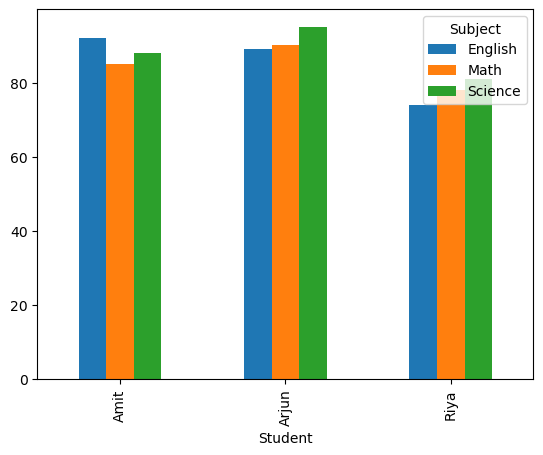

In [15]:
pivot = d.pivot_table(values="Marks",
                       index="Student",
                       columns="Subject")
pivot.plot(kind="bar")  # (You can run in Jupyter)



In [3]:
import pandas as pd

data = {
    "Student": ["Amit", "Riya", "Amit", "Karan", "Riya", "Amit", "Neha", "Karan", "Neha"],
    "Subject": ["Math", "Science", "English", "Math", "English", "Science", "Math", "Science", "English"],
    "Marks": [85, 78, 90, 88, 74, 82, 95, 89, 91]
}

df = pd.DataFrame(data)
print(df)


  Student  Subject  Marks
0    Amit     Math     85
1    Riya  Science     78
2    Amit  English     90
3   Karan     Math     88
4    Riya  English     74
5    Amit  Science     82
6    Neha     Math     95
7   Karan  Science     89
8    Neha  English     91


In [16]:
d=df.groupby("Student")["Marks"].agg(["mean","count","sum"]) #task 1 to group element by these proeprties and find the best subject
print(d)

              mean  count  sum
Student                       
Amit     85.666667      3  257
Karan    88.500000      2  177
Neha     93.000000      2  186
Riya     76.000000      2  152


In [18]:
d.rename(columns={
    "mean":"avgmarks",
    "sum":"total"
},inplace=True)
print(d)

          avgmarks  count  total
Student                         
Amit     85.666667      3    257
Karan    88.500000      2    177
Neha     93.000000      2    186
Riya     76.000000      2    152


In [28]:
d1=df.sort_values(by=["Marks"],ascending=False)
print(d1)

  Student  Subject  Marks
6    Neha     Math     95
8    Neha  English     91
2    Amit  English     90
7   Karan  Science     89
3   Karan     Math     88
0    Amit     Math     85
5    Amit  Science     82
1    Riya  Science     78
4    Riya  English     74


In [24]:
b = d1.drop_duplicates(subset="Student")[["Student", "Subject"]]
print(b)

  Student  Subject
6    Neha     Math
2    Amit  English
7   Karan  Science
1    Riya  Science


In [26]:
summ=d.merge(b, on="Student") #task 1 completes 
print(summ)

  Student   avgmarks  count  total  Subject
0    Amit  85.666667      3    257  English
1   Karan  88.500000      2    177  Science
2    Neha  93.000000      2    186     Math
3    Riya  76.000000      2    152  Science


In [29]:
import pandas as pd #task 1 starting means we have to groupby and show difficulty also 

data = {
    "Student": ["Amit", "Riya", "Amit", "Karan", "Riya", "Amit", "Neha", "Karan", "Neha"],
    "Subject": ["Math", "Science", "English", "Math", "English", "Science", "Math", "Science", "English"],
    "Marks": [85, 78, 90, 88, 74, 82, 95, 89, 91]
}

df = pd.DataFrame(data)
print(df)

  Student  Subject  Marks
0    Amit     Math     85
1    Riya  Science     78
2    Amit  English     90
3   Karan     Math     88
4    Riya  English     74
5    Amit  Science     82
6    Neha     Math     95
7   Karan  Science     89
8    Neha  English     91


In [31]:
d1=df.groupby("Student")["Marks"].agg(["mean","max","min"])
print(d1)

              mean  max  min
Student                     
Amit     85.666667   90   82
Karan    88.500000   89   88
Neha     93.000000   95   91
Riya     76.000000   78   74


In [34]:
d1.rename(columns={"mean": "avg_marks"},inplace=True)


In [37]:
def level(avg):
    if avg < 80:
        return "Hard"
    elif avg <= 90:
        return "Medium"
    else:
        return "Easy"

d1["Difficulty"] = d1["avg_marks"].apply(level)

In [39]:
print(d1) #task 2 complete 

         avg_marks  max  min Difficulty
Student                                
Amit     85.666667   90   82     Medium
Karan    88.500000   89   88     Medium
Neha     93.000000   95   91       Easy
Riya     76.000000   78   74       Hard


In [40]:
p=df.pivot_table(values="Marks",
                 index="Student",
                 columns="Subject",
                 aggfunc="mean")

print(p)

Subject  English  Math  Science
Student                        
Amit        90.0  85.0     82.0
Karan        NaN  88.0     89.0
Neha        91.0  95.0      NaN
Riya        74.0   NaN     78.0


In [ ]:
p.plot(kind="bar")